In [ ]:
from pygeoinf.interval.lebesgue_space import Lebesgue
from pygeoinf.interval.interval_domain import IntervalDomain
from pygeoinf.interval import function_providers as fp
from pygeoinf.interval.providers import BasisProvider

In [19]:
# Create model space
function_domain = IntervalDomain(0, 1)
N = 10
print(f"Creating Lebesgue space with basis='none'")
M = Lebesgue(N, function_domain, basis='none')
print(f"Successfully created space with basis_type: {M._basis_type}")
print(f"Basis provider: {M.basis_provider}")
print(f"Use basis provider: {M._use_basis_provider}")

Creating Lebesgue space with basis='none'
Successfully created space with basis_type: none
Basis provider: None
Use basis provider: False


In [20]:
f_provider = fp.SineFunctionProvider(M)
basis_provider = BasisProvider(M, f_provider, basis_type='sine')
M.set_basis_provider(basis_provider)

<Axes: title={'center': 'Function on [0.0, 1.0]'}, xlabel='x', ylabel='f(x)'>

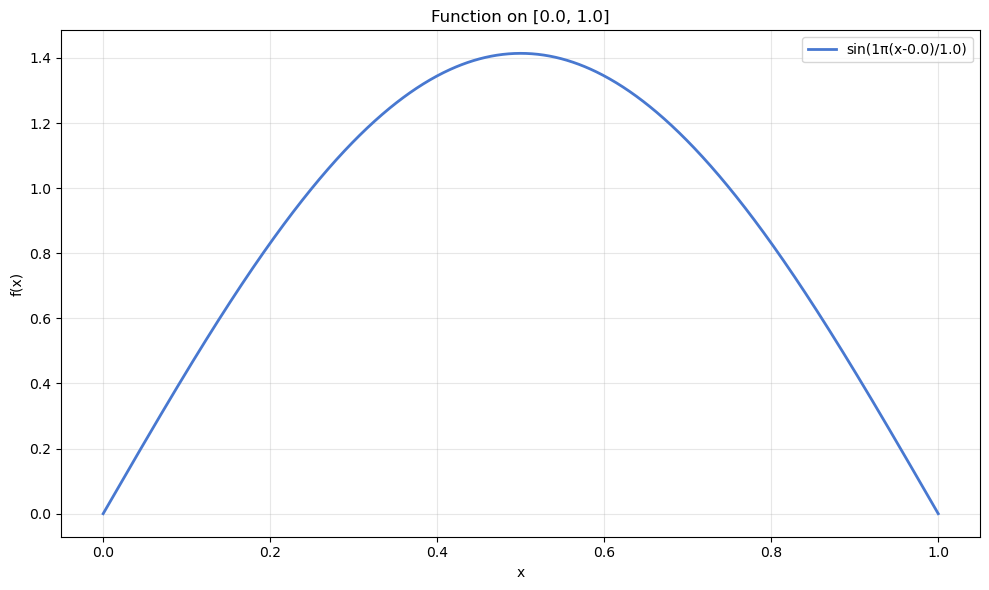

In [21]:
M.get_basis_function(0).plot()

In [24]:
# Reload the module to get the latest changes
import importlib
import sys
modules_to_reload = [mod for mod in sys.modules.keys() if mod.startswith('pygeoinf')]
for mod in modules_to_reload:
    if mod in sys.modules:
        del sys.modules[mod]

# Now import fresh modules
from pygeoinf.interval.lebesgue_space import Lebesgue
from pygeoinf.interval.interval_domain import IntervalDomain

# Test that unimplemented string basis types raise proper errors
try:
    print("Attempting to create space with basis='fourier'...")
    failing_space = Lebesgue(5, function_domain, basis='fourier')
    print(f"❌ Should have failed! Created space with basis_type: {failing_space._basis_type}")
    print(f"   basis_provider: {failing_space.basis_provider}")
    print(f"   use_basis_provider: {failing_space._use_basis_provider}")
except NotImplementedError as e:
    print(f"✅ Correctly caught NotImplementedError: {e}")
except Exception as e:
    print(f"❌ Wrong exception type: {type(e).__name__}: {e}")
    import traceback
    traceback.print_exc()

Attempting to create space with basis='fourier'...
✅ Correctly caught NotImplementedError: String-based basis type 'fourier' not fully implemented yet. Use basis='none' and set_basis_provider() instead.


In [ ]:
# Test that providing a list of callables still works
print("Testing list of callables...")
callables = [
    lambda x: np.ones_like(x),  # constant function
    lambda x: x,                # linear function
    lambda x: x**2              # quadratic function
]

try:
    callable_space = Lebesgue(3, function_domain, basis=callables)
    print(f"✅ Created space with {len(callable_space.basis_functions)} basis functions")
    print(f"   basis_type: {callable_space._basis_type}")
    print(f"   use_basis_provider: {callable_space._use_basis_provider}")

    # Test that we can evaluate the functions
    test_x = 0.5
    for i in range(3):
        func = callable_space.get_basis_function(i)
        value = func.evaluate(test_x)
        print(f"   φ_{i}({test_x}) = {value}")

except Exception as e:
    print(f"❌ Error: {type(e).__name__}: {e}")
    import traceback
    traceback.print_exc()

Testing list of callables...
✅ Created space with 3 basis functions
   basis_type: direct_functions
   use_basis_provider: False
   φ_0(0.5) = 1.0
   φ_1(0.5) = 0.5
   φ_2(0.5) = 0.25


In [26]:
# Test that invalid basis types raise proper errors
print("Testing invalid basis type...")
try:
    invalid_space = Lebesgue(3, function_domain, basis=42)  # Wrong type
    print("❌ Should have failed!")
except TypeError as e:
    print(f"✅ Correctly caught TypeError: {e}")
except Exception as e:
    print(f"❌ Wrong exception type: {type(e).__name__}: {e}")

Testing invalid basis type...
✅ Correctly caught TypeError: basis must be a string or list of callables, got <class 'int'>


## Summary: Lebesgue Space Refactoring

The `Lebesgue` class has been simplified to support the practical workflow:

### ✅ **Supported Cases:**
1. **`basis='none'`** (default) - Creates baseless space for temporary use
2. **`basis=[callable1, callable2, ...]`** - Direct callable list (immediate setup)
3. **BasisProvider via `set_basis_provider()`** - Post-creation setup (typical workflow)

### ❌ **Removed Cases:**
- **`basis=BasisProvider`** - No longer supported (was impractical)
- **`basis='fourier'` etc.** - Not implemented yet (clear error message)

### 🔄 **Typical Workflow:**
```python
# 1. Create baseless space
space = Lebesgue(N, domain, basis='none')  # or just Lebesgue(N, domain)

# 2. Create BasisProvider using the space
provider = BasisProvider(space, function_provider, basis_type='sine')

# 3. Set the provider on the space
space.set_basis_provider(provider)

# 4. Use normally
space.get_basis_function(0).plot()
```

This matches the actual usage pattern and removes unnecessary complexity!

In [27]:
# Test the cleaned up version (no backward compatibility)
import importlib
import sys
modules_to_reload = [mod for mod in sys.modules.keys() if mod.startswith('pygeoinf')]
for mod in modules_to_reload:
    if mod in sys.modules:
        del sys.modules[mod]

from pygeoinf.interval.lebesgue_space import Lebesgue
from pygeoinf.interval.interval_domain import IntervalDomain
import numpy as np

print("=== Testing Cleaned Up Lebesgue Class ===")

# Test 1: baseless space
print("\n1. Testing baseless space:")
domain = IntervalDomain(0, 1)
space1 = Lebesgue(5, domain, basis='none')
print(f"   ✓ Created baseless space: {space1._basis_type}")

# Test 2: callable list
print("\n2. Testing callable list:")
callables = [lambda x: np.ones_like(x), lambda x: x, lambda x: x**2]
space2 = Lebesgue(3, domain, basis=callables)
print(f"   ✓ Created space with callables: {space2._basis_type}")
print(f"   ✓ Has {len(space2.basis_functions)} basis functions")

# Test 3: set basis provider
print("\n3. Testing set_basis_provider:")
from pygeoinf.interval import function_providers as fp
from pygeoinf.interval.providers import BasisProvider

space3 = Lebesgue(4, domain)  # defaults to 'none'
f_provider = fp.SineFunctionProvider(space3)
basis_provider = BasisProvider(space3, f_provider, basis_type='sine')
space3.set_basis_provider(basis_provider)
print(f"   ✓ Set basis provider: {space3._basis_type}")
print(f"   ✓ Can get basis function: {type(space3.get_basis_function(0))}")

print("\n✅ All tests passed! Backward compatibility removed successfully.")

=== Testing Cleaned Up Lebesgue Class ===

1. Testing baseless space:
   ✓ Created baseless space: none

2. Testing callable list:
   ✓ Created space with callables: direct_functions
   ✓ Has 3 basis functions

3. Testing set_basis_provider:
   ✓ Set basis provider: sine
   ✓ Can get basis function: <class 'pygeoinf.interval.functions.Function'>

✅ All tests passed! Backward compatibility removed successfully.


## ✨ Final Cleanup: Removed Backward Compatibility

### **What Was Removed:**
- ❌ `_basis_callables` attribute (no longer stored after transformation)
- ❌ `MockBasisProvider` class (backward compatibility crutch)
- ❌ `callables` property (redundant with Function-based interface)
- ❌ `_validate_basis_options()` method (unused)

### **What Remains:**
- ✅ Clean callable transformation: `list` → `Function` objects → stored in `_basis_functions`
- ✅ Simple state management: `_basis_type`, `_basis_functions`, `basis_provider`, `_use_basis_provider`
- ✅ Clear error messages for unsupported features

### **Memory Efficiency:**
- Callables are used only during construction, then discarded
- Only the transformed `Function` objects are kept
- No redundant storage of both callables and Functions

The class is now streamlined for the actual usage pattern without unnecessary backward compatibility baggage! 🎉